<a href="https://colab.research.google.com/github/amrilhakimsihotang/Machine_Learning_Terapan/blob/Recommender_System_Project/Project_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nama: Amril Hakim Sihotang<br>
##Project : Recommender System

##Import library

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re

from google.colab import files
from google.colab import drive


from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import OneHotEncoder
from tabulate import tabulate

##Mengaitkan Google Drive dengan notebook Colab

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
files.upload();

Saving kaggle.json to kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                          Netflix Movies and TV Shows                          1MB  2024-04-10 09:48:38          19761        430  1.0              
sahirmaharajj/school-student-daily-attendance                   School Student Daily Attendance                      2MB  2024-04-29 19:29:56           4894        102  1.0              
jainaru/diversity-in-tech-companies                             Diversity in Tech Companies                          1KB  2024-05-14 19:45:37            439         25  1.0              
jainaru/thyroid-disease-data                                    T

##Download dataset dari<br>
https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

In [6]:
!kaggle datasets download -d  nelgiriyewithana/top-spotify-songs-2023

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023
License(s): other
  0% 0.00/47.1k [00:00<?, ?B/s]
100% 47.1k/47.1k [00:00<00:00, 55.0MB/s]


##Ekstrak file yang sudah di download dan hasil ekstrak diletakkan di folder files

In [7]:
!unzip -q /content/top-spotify-songs-2023.zip -d /content/files

##Loading dataset top sporty songs 2023

In [8]:
songs_resource='/content/files/spotify-2023.csv'
top_songs = pd.read_csv(songs_resource,encoding='ISO-8859-1')

top_songs

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


##Menampilkan jumlah nilai null dalam setiap kolom untuk proses pembersihan data

In [9]:
print(top_songs.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


##Perintah untuk mendapatkan informasi tentang DataFrame top_song

### Exploratory Data Analysis - Deskripsi Variabel

In [10]:
top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Pada dataset, dapat diamati bahwa beberapa kolom memiliki jumlah yang berbeda, <br>yang menunjukkan adanya missing value dalam data tersebut.

###Exploratory Data Analysis - Menangani Missing Value

In [11]:
print('Total missing value in dataframe:', top_songs.isnull().sum().sum(), 'records')

Total missing value in dataframe: 145 records


Kemudian dilanjutkan untuk memeriksa missing value disetiap kolom.

In [12]:
for col in top_songs.columns:
    missing_values = top_songs[col].isnull().sum()
    if missing_values > 0:
        print(f"Column '{col}' has {missing_values} missing value(s).")

Column 'in_shazam_charts' has 50 missing value(s).
Column 'key' has 95 missing value(s).


Hasilnya adalah memberi informasi tentang dua kolom dalam dataset top_songs, <br>yaitu 'in_shazam_charts' dan 'key', serta jumlah nilai yang hilang dalam masing-masing kolom.<br>


In [13]:
# Menangani missing value
top_songs=top_songs.dropna(axis=1)
#melihat berapa banyak data yang hilang dalam setiap kolom,
#yang berguna untuk pemrosesan dan pembersihan data selanjutnya.

print(top_songs.isnull().sum())

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
bpm                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


Selanjutnya periksa kembali secara keseluruhan untuk deskripsi variabel terbaru<br> setelah melakukan perbaikan pada missing value dikedua kolom sebelumnya.

In [14]:
#Memeriksa kembali info untuk dataset top_songs
top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  bpm                   953 non-null    int64 
 14  mode                  953 non-null    object
 15  danceability_%        953 non-null    in

In [15]:
print('Total missing value in dataframe:', top_songs.isnull().sum().sum(), 'records')

Total missing value in dataframe: 0 records


In [16]:
#menampilkan kembali dataset top_songs
top_songs.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,15,144,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,17,141,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,13,148,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,13,100,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,11,130,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,13,170,Minor,81,56,48,21,0,8,33


##Perintah yang digunakan untuk memberikan ringkasan statistik deskriptif tentang DataFrame top_songs

##Data Preparation - Content-Based Filtering

### Menghapus fitur yang tidak diperlukan,menghapus karakter/angka dan menghapus duplikat data


In [17]:
# Function untuk menghapus karakter / angka
def hapus_karakter_selain_huruf(teks):
    return re.sub(r'[^a-zA-Z]', '', teks)

In [18]:
new_top_songs = top_songs.copy() # membuat salinan baru dari dataframe sebelumnya
new_top_songs.drop_duplicates('track_name',inplace=True) #Menghapus duplikat data
new_top_songs.drop(['artist_count','released_year', 'released_month','released_day',
                    'in_apple_playlists','in_apple_charts','in_deezer_playlists',
                    'in_deezer_charts','mode'],
                   axis=1,inplace=True) #menghapus kolom yang tidak diperlukan
# Melakukan penghapusan karakter/angka pada kolom 'track_name' dari DataFrame
new_top_songs['track_name'] = new_top_songs['track_name'].apply(hapus_karakter_selain_huruf)
new_top_songs

,track_name,artist(s)_name,in_spotify_playlists,in_spotify_charts,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,SevenfeatLattoExplicitVer,"Latto, Jung Kook",553,147,141381703,125,80,89,83,31,0,8,4
1,LALA,Myke Towers,1474,48,133716286,92,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1397,113,140003974,138,51,32,53,17,0,31,6
3,CruelSummer,Taylor Swift,7858,100,800840817,170,55,58,72,11,0,11,15
4,WHERESHEGOES,Bad Bunny,3133,50,303236322,144,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,MyMindMe,Selena Gomez,953,0,91473363,144,60,24,39,57,0,8,3
949,BiggerThanTheWholeSky,Taylor Swift,1180,0,121871870,166,42,7,24,83,1,12,6
950,AVecesfeatFeid,"Feid, Paulo Londra",573,0,73513683,92,80,81,67,4,0,8,6
951,EnLaDeElla,"Feid, Sech, Jhayco",1320,0,133895612,97,82,67,77,8,0,12,5


In [19]:
# Mengubah type streams menjadi numerik
new_top_songs['streams'] = pd.to_numeric(new_top_songs['streams'], errors='coerce')

new_top_songs['streams'] = new_top_songs['streams'].values.astype(np.int64)

<ipython-input-19-11184256db96>:4: RuntimeWarning: invalid value encountered in cast
  new_top_songs['streams'] = new_top_songs['streams'].values.astype(np.int64)


In [20]:
new_top_songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 0 to 952
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            943 non-null    object
 1   artist(s)_name        943 non-null    object
 2   in_spotify_playlists  943 non-null    int64 
 3   in_spotify_charts     943 non-null    int64 
 4   streams               943 non-null    int64 
 5   bpm                   943 non-null    int64 
 6   danceability_%        943 non-null    int64 
 7   valence_%             943 non-null    int64 
 8   energy_%              943 non-null    int64 
 9   acousticness_%        943 non-null    int64 
 10  instrumentalness_%    943 non-null    int64 
 11  liveness_%            943 non-null    int64 
 12  speechiness_%         943 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 103.1+ KB


###Menyamakan track name di dataset spotify<br>
Memahami seberapa banyak lagu yang berbeda-beda terdapat dalam dataset tersebut

In [21]:
print('Ditemukan',len(new_top_songs.track_name.unique()),'track name yang unique')

Ditemukan 935 track name yang unique


###Mendapatkan kumpulan nama lagu yang unik dari new_top_songs

In [22]:
print('Kumpulan nama lagu:\n',new_top_songs.track_name.unique())

Kumpulan nama lagu:
 ['SevenfeatLattoExplicitVer' 'LALA' 'vampire' 'CruelSummer' 'WHERESHEGOES'
 'Sprinter' 'EllaBailaSola' 'Columbia' 'fukumean' 'LaBebeRemix' 'unxto'
 'SuperShy' 'Flowers' 'Daylight' 'AsItWas' 'KillBill' 'CupidTwinVer'
 'WhatWasIMadeForFromTheMotionPictureBarbie' 'Classy' 'LikeCrazy'
 'LADYGAGA' 'ICanSeeYouTaylorsVersionFromThe' 'IWannaBeYours'
 'PesoPlumaBzrpMusicSessionsVol'
 'PopularwithPlayboiCartiMadonnaTheIdolVolMusicfromtheHBOOriginalSeries'
 'SABORFRESA' 'CalmDownwithSelenaGomez' 'MOJABIGHOST' 'LastNight'
 'DanceTheNightFromBarbieTheAlbum' 'Rush' 'TULUM' 'Creepin' 'AntiHero'
 'TQG' 'LosdelEspacio' 'FrgilfeatGrupoFront' 'BlankSpace' 'Style' 'TQM'
 'ElAzul' 'SunflowerSpiderManIntotheSpiderVerse' 'ImGoodBlue'
 'SeeYouAgain' 'BarbieWorldwithAquaFromBarbieTheAlbum' 'AngelsLikeYou'
 'IAintWorried' 'DieForYou' 'Starboy' 'DieForYouRemix' 'ElCielo'
 'BabyDontHurtMe' 'AMARGURA' 'ItGoesLikeNananaEdit' 'AnotherLove'
 'BlindingLights' 'Moonlight' 'LaBachata' 'S' 'cardigan'

###Data visualiation


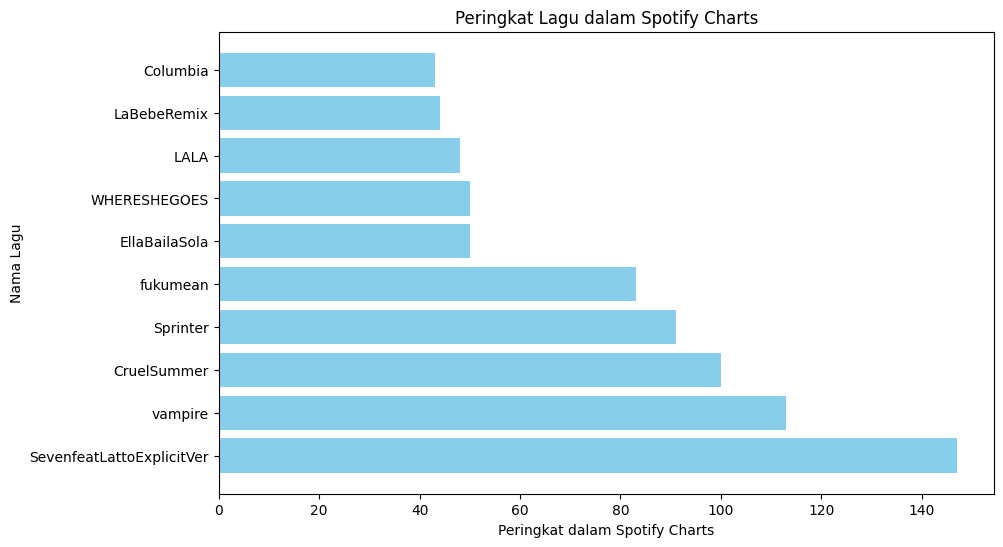

In [23]:
#Grafik di atas menunjukkan peringkat lagu-lagu dalam Spotify Charts
top_10_songs = new_top_songs[['track_name', 'in_spotify_charts']].head(10)
sorted_indices = sorted(range(len(top_10_songs['in_spotify_charts'])), key=lambda k: top_10_songs['in_spotify_charts'][k])
sorted_track_names = [top_10_songs['track_name'][i] for i in sorted_indices]
sorted_ranks = [top_10_songs['in_spotify_charts'][i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_track_names, sorted_ranks, color='skyblue')
plt.xlabel('Peringkat dalam Spotify Charts')
plt.ylabel('Nama Lagu')
plt.title('Peringkat Lagu dalam Spotify Charts')
plt.gca().invert_yaxis()
plt.show()


In [24]:
top_10_songs

,track_name,in_spotify_charts
0,SevenfeatLattoExplicitVer,147
1,LALA,48
2,vampire,113
3,CruelSummer,100
4,WHERESHEGOES,50
5,Sprinter,91
6,EllaBailaSola,50
7,Columbia,43
8,fukumean,83
9,LaBebeRemix,44


## Data Preparation - Collaborative Filtering



In [25]:
# Menambahkan kolom song_ID pada dataset
cf_top_songs = new_top_songs.copy() # membuat salinan baru dari dataframe sebelumnya untuk model Collaborative Filter
# Membuat song_id untuk kolom track_name
track_name_to_song_id = {track_names: song_id for song_id, track_names in enumerate(cf_top_songs['track_name'].unique(), start=1)}
# Membuat user_id untuk kolom artis(s)_name
artist_to_user_id = {artist_name: user_id for user_id, artist_name in enumerate(cf_top_songs['artist(s)_name'].unique(), start=1)}
cf_top_songs['user_id'] = cf_top_songs['artist(s)_name'].map(artist_to_user_id)
cf_top_songs['song_id'] = cf_top_songs['track_name'].map(track_name_to_song_id)
cf_top_songs

,track_name,artist(s)_name,in_spotify_playlists,in_spotify_charts,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,user_id,song_id
0,SevenfeatLattoExplicitVer,"Latto, Jung Kook",553,147,141381703,125,80,89,83,31,0,8,4,1,1
1,LALA,Myke Towers,1474,48,133716286,92,71,61,74,7,0,10,4,2,2
2,vampire,Olivia Rodrigo,1397,113,140003974,138,51,32,53,17,0,31,6,3,3
3,CruelSummer,Taylor Swift,7858,100,800840817,170,55,58,72,11,0,11,15,4,4
4,WHERESHEGOES,Bad Bunny,3133,50,303236322,144,65,23,80,14,63,11,6,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,MyMindMe,Selena Gomez,953,0,91473363,144,60,24,39,57,0,8,3,639,931
949,BiggerThanTheWholeSky,Taylor Swift,1180,0,121871870,166,42,7,24,83,1,12,6,4,932
950,AVecesfeatFeid,"Feid, Paulo Londra",573,0,73513683,92,80,81,67,4,0,8,6,640,933
951,EnLaDeElla,"Feid, Sech, Jhayco",1320,0,133895612,97,82,67,77,8,0,12,5,641,934


In [26]:
song_ids = cf_top_songs['song_id'].unique().tolist()
print('list song_id: ', song_ids)

# Encoding song_ID
song_encoded = {x: i for i, x in enumerate(song_ids)}
print('encoded song_id : ', song_encoded)

# Melakukan proses encoding angka ke ke song_ID
song_encoded_to_song = {i: x for i, x in enumerate(song_ids)}
print('encoded angka ke song_id: ', song_encoded_to_song)

list song_id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

In [27]:
# Mendapatkan jumlah song_id
num_songs = len(song_encoded)
print('Jumlah song id :',num_songs)

Jumlah song id : 935


In [28]:
user_ids = cf_top_songs['user_id'].unique().tolist()
print('list user_id: ', user_ids)

# Encoding user_ID
user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_encoded)

# Melakukan proses encoding angka ke ke user_ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

In [29]:
# Mendapatkan jumlah user_id
num_users = len(user_encoded)
print('Jumlah user id :',num_users)

Jumlah user id : 641


In [30]:
# Nilai minimum
min_streams = min(cf_top_songs['streams'])

# Nilai maksimal
max_streams = max(cf_top_songs['streams'])

print('nilai min streams',min_streams)
print('nilai max streams',max_streams)

nilai min streams -9223372036854775808
nilai max streams 3703895074


In [31]:
# One-hot encoding
encoder = OneHotEncoder()
artist_onehot = encoder.fit_transform(cf_top_songs[['artist(s)_name']])


##Train-Test Split untuk Collaborative Filtering - Karena dataset ini dibawah 1000 baris, maka rasio pembagian dataset cf_top_songs menggunakan 70:30

In [32]:
# Acak urutan baris dalam DataFrame
cf_top_songs = cf_top_songs.sample(frac=1, random_state=42).reset_index(drop=True)


cf_top_songs_encoded = pd.concat([pd.DataFrame(artist_onehot.toarray()), cf_top_songs['bpm']], axis=1)
x = cf_top_songs_encoded.values

# Membuat variabel y untuk membuat streams dari hasil
y = cf_top_songs['streams'].apply(lambda x: (x - min_streams) / (max_streams - min_streams)).values

# Membagi menjadi 70% data train dan 30% data validasi
train_indices = int(0.7 * cf_top_songs.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
print("Total sample data:", len(cf_top_songs))
print("Dimensi x_train:", x_train.shape)
print("Dimensi x_val:", x_val.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi y_val:", y_val.shape)
print(x, y)

Total sample data: 943
Dimensi x_train: (660, 642)
Dimensi x_val: (283, 642)
Dimensi y_train: (660,)
Dimensi y_val: (283,)
[[  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 144.]
 [  0.   0.   0. ...   0.   0. 105.]
 ...
 [  0.   0.   0. ...   0.   0.  97.]
 [  0.   0.   0. ...   0.   0. 125.]
 [  0.   0.   0. ...   0.   0. 170.]] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

##Modeling

Pada proyek ini,akan menggunakan model content-based filtering dan collaborative filtering sebagai pembanding hasil nantinya.

###Model content-based filtering

In [33]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data track_name
tf.fit(new_top_songs['track_name'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['abcdario', 'abcdefu', 'aboutdamntime', 'acapulco', 'acrs',
       'adoreyou', 'afraidtofeel', 'afterdark', 'afterhours', 'afterlike',
       'agosto', 'aguacero', 'agudomgi',
       'ahollyjollychristmassingleversion', 'aintshit', 'ainttha',
       'aipreto', 'alienblues', 'aliensuperstar',
       'allforusfromthehbooriginalserieseuphoria',
       'alliwantforchristmasisyou', 'allmylifefeatjcole', 'allofme',
       'allofthegirlsyoulovedbefore',
       'allthewaylivespidermanacrossthespiderversemetroboominfutureliluzivert',
       'alltoowellminuteversiontaylorsversionfromthevault', 'alone',
       'amargura', 'americahasaproblemfeatkendricklamar', 'amg',
       'amidreamingmetroboominaaprockyroisee', 'amremix', 'andrea',
       'angelbaby', 'angelptfeatjiminofbtsjvkemunilong', 'angelslikeyou',
       'annihilatespidermanacrossthespiderversemetroboominswaeleelilwayneoffset',
       'anotherlove', 'antesdeperderte', 'antidepresan', 'antifragile',
       'antihero', 'apnabanalefr

In [34]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(new_top_songs['track_name'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(943, 929)

In [35]:
tfidf_matrix.todense() # Matrix TF-IDF dalam bentuk dense

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
pd.DataFrame(
    tfidf_matrix.todense(), # Matrix TF-IDF dalam bentuk dense
    columns=tf.get_feature_names_out(),# Nama fitur untuk kolom
    index=new_top_songs.track_name # Nama lagu untuk indeks baris
).sample(22, axis=1).sample(20, axis=0)

,mounteverest,vigilanteshit,whereshegoes,untilifoundyou,matilda,enchantedtaylorsversion,puntog,bejeweled,yanosomosniseremos,youbelongwithmetaylorsve,...,cheques,stilldre,waitaminute,yonaguni,sorrynotsorry,jimmycooksfeatsavage,atalebyquincy,onthestreetwithjcole,allofme,dreamon
track_name,,,,,,,,,,,,,,,,,,,,,
ResidenteBzrpMusicSessionsVol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KarmafeatIceSpice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DemasiadasMujeres,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TomsDiner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Excuses,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DontYouWorry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ImGoodBlue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Labyrinth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VolandoRemix,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [38]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom
cosine_sim_df = pd.DataFrame(cosine_sim, index=new_top_songs['track_name'], columns=new_top_songs['track_name'])
print('Shape:', cosine_sim_df.shape)

# Hasil similarity matrix pada setiap track_name
cosine_sim_df.sample(5, axis=1).sample(20, axis=0)

Shape: (943, 943)


track_name,august,BoyWithLuvfeatHalsey,EvoquePrata,BarbieWorldwithAquaFromBarbieTheAlbum,Daylight
track_name,,,,,
ILikeYouAHappierSongwithDojaCat,0.0,0.0,0.0,0.0,0.0
DawnFM,0.0,0.0,0.0,0.0,0.0
KarmafeatIceSpice,0.0,0.0,0.0,0.0,0.0
ShutupMyMomsCalling,0.0,0.0,0.0,0.0,0.0
CayLaNochefeatCruzCafunAbhirHathiBejoELIMA,0.0,0.0,0.0,0.0,0.0
Komang,0.0,0.0,0.0,0.0,0.0
TQG,0.0,0.0,0.0,0.0,0.0
DeckTheHallRemastered,0.0,0.0,0.0,0.0,0.0
Heartless,0.0,0.0,0.0,0.0,0.0


In [39]:
def music_recommendations(track_name, similarity_data=cosine_sim_df, items=new_top_songs[['track_name','artist(s)_name', 'in_spotify_playlists','streams']], k=5):
     # Memeriksa apakah track_name ada dalam kolom similarity_data
    if track_name not in similarity_data.columns:
        return f"Track '{track_name}' tidak ditemukan dalam data."

    # Menemukan indeks dari lagu yang memiliki kemiripan tertinggi dengan track_name
    index = similarity_data.loc[:,track_name].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    # Menghapus track_name dari daftar closest, jika ada
    closest = closest.drop(track_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [40]:
new_top_songs[new_top_songs.track_name.eq('LALA')]

,track_name,artist(s)_name,in_spotify_playlists,in_spotify_charts,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
1,LALA,Myke Towers,1474,48,133716286,92,71,61,74,7,0,10,4


In [41]:
music_recommendations('LALA')

,track_name,artist(s)_name,in_spotify_playlists,streams
0,IfWeEverBrokeUp,Mae Stephens,2040,165584767
1,DijeronQueNoLaIbaLograr,"Fuerza Regida, Chino Pacas",320,116334601
2,SomethingintheOrange,Zach Bryan,3282,449701773
3,MidnightRain,Taylor Swift,2612,433356509
4,VOID,Melanie Martinez,596,67070410


###Model collaborative filtering

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class RecommenderNet(tf.keras.Model):

  def __init__(self, num_users, num_songs, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_songs = num_songs
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.song_embedding = layers.Embedding(
        num_songs,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=keras.regularizers.l2(1e-6)
    )
    self.song_bias = layers.Embedding(num_songs, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:, 0])  # id_user
    user_bias = self.user_bias(inputs[:, 0])
    song_vector = self.song_embedding(inputs[:, 1])  # id_song
    song_bias = self.song_bias(inputs[:, 1])

    dot_user_song = tf.tensordot(user_vector, song_vector, 2)

    x = dot_user_song + user_bias + song_bias

    return tf.nn.sigmoid(x)


In [43]:
model = RecommenderNet(num_users, num_songs, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)


In [44]:
# Proses mulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
83/83 [==============================] - 2s 10ms/step - loss: 0.2485 - root_mean_squared_error: 0.2499 - val_loss: 0.0409 - val_root_mean_squared_error: 0.0440
Epoch 2/100
83/83 [==============================] - 0s 5ms/step - loss: 0.0250 - root_mean_squared_error: 0.0434 - val_loss: 0.0106 - val_root_mean_squared_error: 0.0170
Epoch 3/100
83/83 [==============================] - 0s 5ms/step - loss: 0.0145 - root_mean_squared_error: 0.0395 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0123
Epoch 4/100
83/83 [==============================] - 0s 5ms/step - loss: 0.0125 - root_mean_squared_error: 0.0392 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0102
Epoch 5/100
83/83 [==============================] - 0s 6ms/step - loss: 0.0120 - root_mean_squared_error: 0.0391 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0091
Epoch 6/100
83/83 [==============================] - 0s 6ms/step - loss: 0.0119 - root_mean_squared_error: 0.0390 - val_loss: 0.0027 - val_root_

##Visualisasi Metrik - Collaborative Filtering

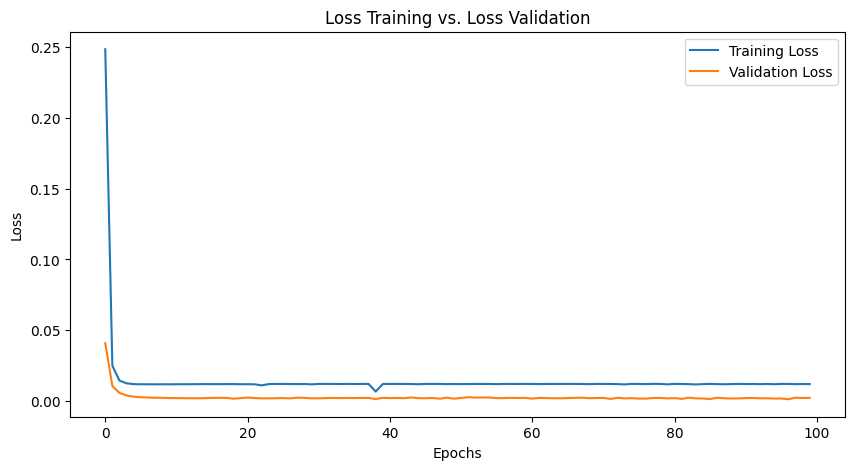

In [45]:
# Tampilan grafik Loss Training vs. Loss Validation
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Training vs. Loss Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



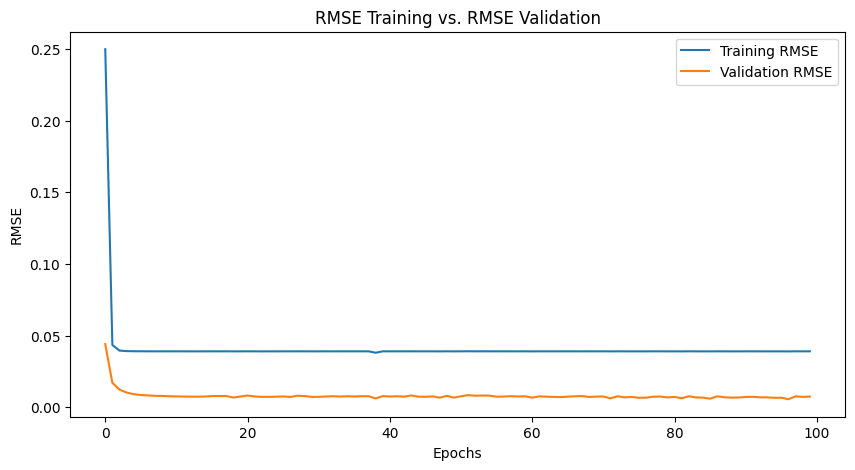

In [46]:
# Tampilan grafik RMSE Training vs. RMSE Validation
plt.figure(figsize=(10, 5))
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('RMSE Training vs. RMSE Validation')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()


In [47]:
#Menjalankan rekomendasi lagu

max_song_id = cf_top_songs['song_id'].max() #total lagu

user_id = 4 # Pilih user_id yang ingin diberikan rekomendasi

# Ambil semua song_id yang ada dalam dataset
all_song_ids = cf_top_songs['song_id'].unique()

# Verifikasi rentang song_id
valid_song_ids = [song_id for song_id in all_song_ids if song_id < max_song_id]

# Buat data pengguna dengan song_id yang valid
user_data = np.array([[user_id, song_id] for song_id in valid_song_ids])

# Membuat prediksi menggunakan model
predictions = model.predict(user_data)

# Gabungkan prediksi dengan song_id
predicted_streams = pd.DataFrame({
    'song_id': valid_song_ids,
    'predicted_streams': predictions.flatten()
})

# Gabungkan prediksi dengan informasi lagu yang ada di cf_top_songs
predicted_streams = predicted_streams.merge(cf_top_songs[['song_id', 'track_name', 'artist(s)_name', 'in_spotify_playlists', 'streams']].drop_duplicates(), on='song_id')

# Sortir berdasarkan streams tertinggi
top_songs = predicted_streams.sort_values(by='predicted_streams', ascending=False).head(10)  # Ambil 10 lagu teratas

# Tampilkan rekomendasi lagu dalam format tabel
table_data = top_songs[['song_id', 'track_name', 'artist(s)_name', 'in_spotify_playlists', 'streams']].values.tolist()
print("Rekomendasi lagu untuk user_id {}:".format(user_id))
print(tabulate(table_data, headers=['song_id', 'track_name', 'artist(s)_name', 'in_spotify_playlists', 'streams'], tablefmt='grid'))


30/30 [==============================] - 0s 2ms/step
Rekomendasi lagu untuk user_id 4:
+-----------+-------------------------------------+----------------------------------------------------------+------------------------+------------+
|   song_id | track_name                          | artist(s)_name                                           |   in_spotify_playlists |    streams |
+===========+=====================================+==========================================================+========================+============+
|         1 | SevenfeatLattoExplicitVer           | Latto, Jung Kook                                         |                    553 |  141381703 |
+-----------+-------------------------------------+----------------------------------------------------------+------------------------+------------+
|       904 | BABYOTAKU                           | Fran C, Polima WestCoast, Nickoog Clk, Pablito Pesadilla |                    836 |  159240673 |
+-----------+------